## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('task_d.csv')

In [4]:
data.head()

x         y         z       x*x       2*y  2*z+3*x*x         w  \
0 -0.581066  0.841837 -1.012978 -0.604025  0.841837  -0.665927 -0.536277   
1 -0.894309 -0.207835 -1.012978 -0.883052 -0.207835  -0.917054 -0.522364   
2 -1.207552  0.212034 -1.082312 -1.150918  0.212034  -1.166507  0.205738   
3 -1.364174  0.002099 -0.943643 -1.280666  0.002099  -1.266540 -0.665720   
4 -0.737687  1.051772 -1.012978 -0.744934  1.051772  -0.792746 -0.735054   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task: 1 Logistic Regression

1. Finding the Correlation between the features

a-Check the correlation between the featurs


In [45]:
d = data.drop(['target','w'], axis=1)

In [8]:
cor = d.corr()
cor

x         y         z       x*x       2*y  2*z+3*x*x
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000

b-plot heat map of correlation matrix using seaborn heatmap

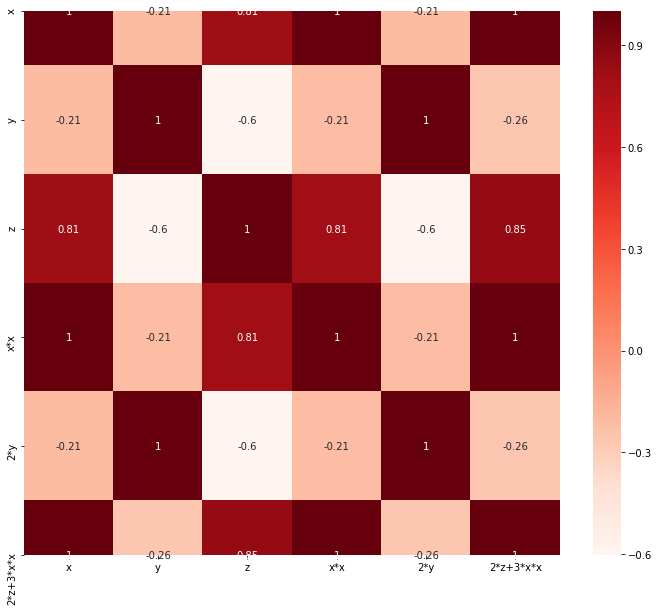

In [9]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))
cor = d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 2. Finding the best model for the given data

a. Train Logistic regression on data(X,Y) that we have created in the above cell

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [11]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator = LogisticRegression(),param_grid={
            'C': [0.0001,0.001,0.1,1,10,100]})
gsc.fit(X,Y)

best_C = gsc.best_params_
print("Best value for hyperpaerameter C = ",best_C)

Best value for hyperpaerameter C =  {'C': 0.0001}


c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'¶

In [12]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 3. Getting the weights with the original data

a. train the 'best_model' with X, Y¶

In [13]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

b. Check the accuracy of the model 'best_model_accuracy'

In [14]:
# To find accuracy of the best_model the data is divided into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, stratify=Y)

In [15]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X_train,y_train)
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy = a/len(y_test)
print("The accuracy of the best_model = ",best_model_accuracy)

The accuracy of the best_model =  1.0


c. Get the weights W using bestmodel.coef

In [16]:
best_w = best_model.coef_
print(best_w)

[[ 0.00324355 -0.00325596  0.00434369  0.00321061 -0.00325596  0.003414
   0.00279911]]


# 4. Modifying original data


a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [17]:
# Adding a noise of order 10^-2 to each element of X 
noise = 0.01
X_ = X
for i in X_:
    for j in range(len(i)):
        i[j] = i[j] + noise

b. Train the same 'best_model' with data (X', Y)

In [18]:
best_model.fit(X_,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

c. Check the accuracy of the model 'best_model_accuracy_edited'

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.10, stratify=Y)

In [20]:
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy_edited = a/len(y_test)
print("The accuracy of the edited best_model = ",best_model_accuracy_edited)

The accuracy of the edited best_model =  1.0


d. Get the weights W' using bestmodel.coef

In [21]:
best_w_edited = best_model.coef_
print(best_w_edited)

[[ 0.00359629 -0.00341974  0.00479981  0.00355268 -0.00341974  0.00377694
   0.00316971]]


# 5. Checking deviations in metric and weights

a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [22]:
difference_between_accuracy = best_model_accuracy_edited - best_model_accuracy
print(difference_between_accuracy)

0.0


b. find the absolute change between each value of W and W' ==> |(W-W')|

In [23]:
difference_between_w = np.absolute(best_w - best_w_edited)
print(difference_between_w)

# Converting into list
difference_between_w_list = []
for i in difference_between_w[0]:
    difference_between_w_list.append(i)
print(difference_between_w_list)

[[0.00035274 0.00016378 0.00045612 0.00034208 0.00016378 0.00036294
  0.00037059]]
[0.0003527421452046652, 0.0001637833495918466, 0.00045612134730225844, 0.0003420761321797491, 0.0001637833495918466, 0.0003629402673247335, 0.00037059167310742264]


c. print the top 4 features which have higher % change in weights compare to the other

In [24]:
colum = []
for col in data.columns: 
    if col != 'target':
        colum.append(col)

In [25]:
keys  = colum
values = difference_between_w_list
dictionary = dict(zip(keys,values))
print(dictionary)

{'x': 0.0003527421452046652, 'y': 0.0001637833495918466, 'z': 0.00045612134730225844, 'x*x': 0.0003420761321797491, '2*y': 0.0001637833495918466, '2*z+3*x*x': 0.0003629402673247335, 'w': 0.00037059167310742264}


In [26]:
#sorting of dictionry : https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
sort_dict = sorted(dictionary.items(), key=lambda item: item[1],reverse= True)[:4]
print("top 4 features which have higher % change in weights:")
for i in sort_dict:
    print(i)

top 4 features which have higher % change in weights:
('z', 0.00045612134730225844)
('w', 0.00037059167310742264)
('2*z+3*x*x', 0.0003629402673247335)
('x', 0.0003527421452046652)


# Task 2: Linear SVM

# 2. Finding the best model for the given data

a. Train Linear SVM on data(X,Y) that we have created in the above cell

# from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X,Y)

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [28]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator = SVC(kernel = 'linear'),param_grid={
            'C': [0.0001,0.001,0.1,1,10,100]})
gsc.fit(X,Y)

best_C = gsc.best_params_
print("Best value for hyperpaerameter C = ",best_C)

Best value for hyperpaerameter C =  {'C': 0.1}


c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [29]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# 3. Getting the weights with the original data

a. train the 'best_model' with X, Y

In [31]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

b. Check the accuracy of the model 'best_model_accuracy'

In [32]:
# To find accuracy of the best_model the data is divided into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, stratify=Y)

In [33]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X_train,y_train)
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy = a/len(y_test)
print("The accuracy of the best_model = ",best_model_accuracy)

The accuracy of the best_model =  1.0


c. Get the weights W using bestmodel.coef

In [34]:
best_w = best_model.coef_
print(best_w)

[[ 0.20609498 -0.29438078  0.66716312  0.18620358 -0.29438078  0.248133
   0.09744894]]


# 4. Modifying original data

a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [35]:
noise = 0.01
X_ = X
for i in X_:
    for j in range(len(i)):
        i[j] = i[j] + noise

b. Train the same 'best_model' with data (X', Y)¶

In [36]:
best_model.fit(X_,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

c. Check the accuracy of the model 'best_model_accuracy_edited'

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.10, stratify=Y)

In [38]:
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy_edited = a/len(y_test)
print("The accuracy of the edited best_model = ",best_model_accuracy_edited)

The accuracy of the edited best_model =  1.0


d. Get the weights W' using bestmodel.coef

In [39]:
best_w_edited = best_model.coef_
print(best_w_edited)

[[ 0.20595134 -0.29522977  0.66738522  0.18607665 -0.29522977  0.24804557
   0.09666126]]


# 5. Checking deviations in metric and weights

a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [40]:
difference_between_accuracy = best_model_accuracy_edited - best_model_accuracy
print(difference_between_accuracy)

0.0


b. find the absolute change between each value of W and W' ==> |(W-W')|

In [41]:
difference_between_w = np.absolute(best_w - best_w_edited)
print(difference_between_w_list)

[0.0003527421452046652, 0.0001637833495918466, 0.00045612134730225844, 0.0003420761321797491, 0.0001637833495918466, 0.0003629402673247335, 0.00037059167310742264]


c. print the top 4 features which have higher % change in weights compare to the other

In [42]:
colum = []
for col in data.columns: 
    if col != 'target':
        colum.append(col)

In [43]:
keys  = colum
values = difference_between_w_list
dictionary = dict(zip(keys,values))
print(dictionary)

{'x': 0.0003527421452046652, 'y': 0.0001637833495918466, 'z': 0.00045612134730225844, 'x*x': 0.0003420761321797491, '2*y': 0.0001637833495918466, '2*z+3*x*x': 0.0003629402673247335, 'w': 0.00037059167310742264}


In [44]:
#sorting of dictionry : https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
sort_dict = sorted(dictionary.items(), key=lambda item: item[1],reverse= True)[:4]
print("top 4 features which have higher % change in weights:")
for i in sort_dict:
    print(i)

top 4 features which have higher % change in weights:
('z', 0.00045612134730225844)
('w', 0.00037059167310742264)
('2*z+3*x*x', 0.0003629402673247335)
('x', 0.0003527421452046652)
